In [1]:
import torch
import clip
from PIL import Image
import torch.nn.functional as F

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

image = preprocess(Image.open("/root/autodl-tmp/benchmark/instance/dog3/01.jpg")).unsqueeze(0).to(device)
text = clip.tokenize(["a diagram", "a dog", "a cat"]).to(device)

with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)

    print(image_features.shape)
    print(text_features.shape)

    
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

print("Label probs:", probs)

torch.Size([1, 512])
torch.Size([3, 512])
Label probs: [[0.002127 0.9873   0.010796]]


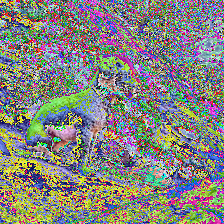

In [9]:
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display

transform1 = transforms.Compose([
    transforms.Resize((224, 224), interpolation=transforms.InterpolationMode.BICUBIC),
    transforms.CenterCrop((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711)),
    transforms.ToPILImage()
])

image1 = Image.open("/root/autodl-tmp/benchmark/instance/dog3/01.jpg")
image2 = transform1(image1)

display(image2)

In [10]:
from moviepy.editor import VideoFileClip
from PIL import Image

def video2images(video_file):
    images = []
    video = VideoFileClip(video_file)
    for frame in video.iter_frames(fps = video.fps):
        pil_image = Image.fromarray(frame)

/root/miniconda3/envs/ENV1/lib/python3.9/site-packages/torchvision/io/video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


torch.Size([24, 512, 512, 3])


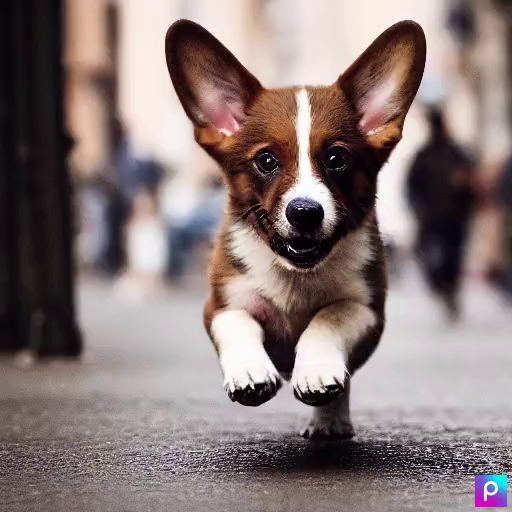

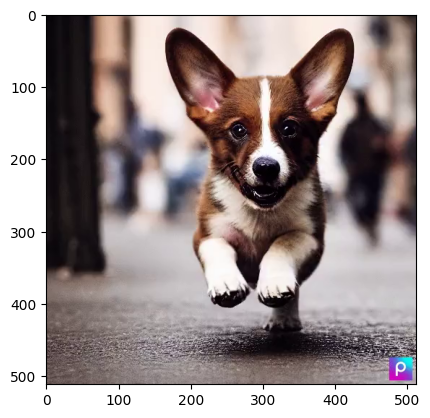

In [19]:
from torchvision.io import read_video

video = read_video('example.mp4')

print(video[0].shape)

transform2 = transforms.Compose(
    [
        transforms.ToPILImage()
    ]
)

plt.imshow(video[0][0])

display(transform2(video[0][0].permute(2, 0, 1)))

In [ ]:
video = read_video('example.mp4')

